In [1]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("FlightDataAnalysis").getOrCreate()

In [2]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("FlightDataAnalysis").getOrCreate()


In [2]:
file_paths = ["C:/Users/anamt/OneDrive/Desktop/Adv DBM/datasets/myarchive/Combined_Flights_2018.csv","C:/Users/anamt/OneDrive/Desktop/Adv DBM/datasets/myarchive/Combined_Flights_2019.csv","C:/Users/anamt/OneDrive/Desktop/Adv DBM/datasets/myarchive/Combined_Flights_2020.csv","C:/Users/anamt/OneDrive/Desktop/Adv DBM/datasets/myarchive/Combined_Flights_2021.csv","C:/Users/anamt/OneDrive/Desktop/Adv DBM/datasets/myarchive/Combined_Flights_2022.csv"]

In [3]:
flight_data = spark.read.csv(file_paths, header=True, inferSchema=True)

In [6]:
flight_data.show(5)

+----------+-----------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrD

In [9]:
# Getting the wanted Attributes
delayed_attrs = ['Airline', 'Origin', 'Dest', 'Distance', 'CRSArrTime', 'CRSDepTime', 'CRSElapsedTime', 
                 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 
                'Operated_or_Branded_Code_Share_Partners', 'IATA_Code_Marketing_Airline', 'Operating_Airline', 
                'IATA_Code_Operating_Airline']

In [4]:
df = spark.read.csv(file_paths, header=True, inferSchema=True)

In [11]:
# Selecting a row where flight was delayed
df[df['Distance'] == 2378.0][delayed_attrs]

DataFrame[Airline: string, Origin: string, Dest: string, Distance: double, CRSArrTime: int, CRSDepTime: int, CRSElapsedTime: double, Year: int, Quarter: int, Month: int, DayofMonth: int, DayOfWeek: int, Marketing_Airline_Network: string, Operated_or_Branded_Code_Share_Partners: string, IATA_Code_Marketing_Airline: string, Operating_Airline: string, IATA_Code_Operating_Airline: string]

In [12]:
from pyspark.sql.functions import avg

average_arrival_delay_per_airline = flight_data.groupBy("Airline").agg(avg("ArrDelay").alias("AverageDelayArrival"))
average_arrival_delay_per_airline.show()

+--------------------+--------------------+
|             Airline| AverageDelayArrival|
+--------------------+--------------------+
|GoJet Airlines, L...|   7.017502794595365|
|   Endeavor Air Inc.|  -1.130138277941532|
|       Allegiant Air|  11.220938049714015|
|SkyWest Airlines ...|   4.366785732158537|
|      Virgin America|  1.7279776132454965|
|         Horizon Air|  0.7050674579055263|
|United Air Lines ...|   4.542437802211555|
|Air Wisconsin Air...|   4.928156105252784|
|Trans States Airl...|  14.368709474734258|
|    Compass Airlines|  5.3128097036663675|
|Peninsula Airways...|  16.454426515481902|
|Frontier Airlines...|   8.279359917111568|
|            Cape Air| -1.4138972809667674|
|Southwest Airline...|   2.412109305253325|
|ExpressJet Airlin...|   9.410660012535626|
|     JetBlue Airways|  10.297634751178432|
|Commutair Aka Cha...|  15.955488681822027|
|Empire Airlines Inc.|    4.53715733701912|
|Hawaiian Airlines...| 0.36489045347770355|
|Alaska Airlines Inc.|-0.2617004

In [13]:
from pyspark.sql.functions import avg

average_departure_delay_per_airline = flight_data.groupBy("Airline").agg(avg("DepDelay").alias("AverageDelayDeparture"))
average_departure_delay_per_airline.show()

+--------------------+---------------------+
|             Airline|AverageDelayDeparture|
+--------------------+---------------------+
|GoJet Airlines, L...|    12.44094812111058|
|   Endeavor Air Inc.|    6.101869168440007|
|       Allegiant Air|   12.510521189026022|
|SkyWest Airlines ...|    9.715716497378608|
|      Virgin America|   6.3338359819046515|
|         Horizon Air|   3.3034833107191317|
|United Air Lines ...|   10.193307643487321|
|Air Wisconsin Air...|     9.56229008591642|
|Trans States Airl...|   17.039510818438384|
|    Compass Airlines|    9.692562555955641|
|Peninsula Airways...|   18.104104951333053|
|Frontier Airlines...|   13.610552430053172|
|            Cape Air|  -2.7293550331525016|
|Southwest Airline...|   10.104475805311235|
|ExpressJet Airlin...|   12.208417890225764|
|     JetBlue Airways|    16.09799383432104|
|Commutair Aka Cha...|   18.737110631573035|
|Empire Airlines Inc.|    4.454769736842105|
|Hawaiian Airlines...|   1.6996012233051991|
|Alaska Ai

In [14]:
filtered_df = df.filter(df["DepDelay"] > 0)
selected_columns = df.select("FlightDate", "Airline", "DepDelay", "ArrDelay")

In [15]:
avg_delay_per_airline = df.groupBy("Airline").agg({"DepDelay": "avg", "ArrDelay": "avg"})
avg_delay_per_airline.show()

+--------------------+-------------------+--------------------+
|             Airline|      avg(DepDelay)|       avg(ArrDelay)|
+--------------------+-------------------+--------------------+
|GoJet Airlines, L...|  12.44094812111058|   7.017502794595365|
|   Endeavor Air Inc.|  6.101869168440007|  -1.130138277941532|
|       Allegiant Air| 12.510521189026022|  11.220938049714015|
|SkyWest Airlines ...|  9.715716497378608|   4.366785732158537|
|      Virgin America| 6.3338359819046515|  1.7279776132454965|
|         Horizon Air| 3.3034833107191317|  0.7050674579055263|
|United Air Lines ...| 10.193307643487321|   4.542437802211555|
|Air Wisconsin Air...|   9.56229008591642|   4.928156105252784|
|Trans States Airl...| 17.039510818438384|  14.368709474734258|
|    Compass Airlines|  9.692562555955641|  5.3128097036663675|
|Peninsula Airways...| 18.104104951333053|  16.454426515481902|
|Frontier Airlines...| 13.610552430053172|   8.279359917111568|
|            Cape Air|-2.729355033152501

In [16]:
sorted_df = df.sort("DepDelay", ascending=False)

In [17]:
summary = df.describe(["DepDelay", "ArrDelay"])

In [18]:
from pyspark.sql.functions import year, month, dayofweek

# Extract year, month, and day of the week
df = df.withColumn("Year", year("FlightDate"))
df = df.withColumn("Month", month("FlightDate"))
df = df.withColumn("DayOfWeek", dayofweek("FlightDate"))

In [19]:
from pyspark.sql.functions import avg

monthly_avg_delay = df.groupBy("Month").agg(avg("DepDelay").alias("AvgDepartureDelay"))
monthly_avg_delay.show()

+-----+------------------+
|Month| AvgDepartureDelay|
+-----+------------------+
|    1| 8.148353998739966|
|   10| 7.156916619941434|
|   11| 6.562331303775406|
|   12| 10.08585047538936|
|    2| 9.944549150516679|
|    3|7.0170949269857985|
|    4| 8.375620317346973|
|    5|  9.81835975112155|
|    6|14.093492866563166|
|    7|13.035756453953605|
|    8|11.392843299356883|
|    9| 5.719522928109177|
+-----+------------------+



In [20]:
day_of_week_avg_delay = df.groupBy("DayOfWeek").agg(avg("DepDelay").alias("AvgDepartureDelay"))
day_of_week_avg_delay.show()


+---------+------------------+
|DayOfWeek| AvgDepartureDelay|
+---------+------------------+
|        1| 9.954789262591762|
|        6| 10.54291172989064|
|        3| 7.743807422411007|
|        5|10.218196376073603|
|        4| 7.598238371246396|
|        7| 8.770662409125066|
|        2|10.066996651087477|
+---------+------------------+



In [21]:
quarterly_avg_delay = df.groupBy("Quarter").agg(avg("DepDelay").alias("AvgDepartureDelay"))
quarterly_avg_delay.show()

+-------+------------------+
|Quarter| AvgDepartureDelay|
+-------+------------------+
|      1|  8.29383214359631|
|      4| 7.938014291298459|
|      2|10.776188973941883|
|      3|10.248127515716321|
+-------+------------------+



In [22]:
from pyspark.sql.functions import when

df = df.withColumn("TimeBlock", when(df["CRSDepTime"] < 1200, "Morning")
                                  .when((df["CRSDepTime"] >= 1200) & (df["CRSDepTime"] < 1700), "Afternoon")
                                  .otherwise("Evening"))

time_block_avg_delay = df.groupBy("TimeBlock").agg(avg("DepDelay").alias("AvgDepartureDelay"))
time_block_avg_delay.show()

+---------+------------------+
|TimeBlock| AvgDepartureDelay|
+---------+------------------+
|  Evening|14.678618238749202|
|  Morning|  4.82414387325693|
|Afternoon|10.527056794151312|
+---------+------------------+



In [23]:
# from pyspark.sql import SparkSession
from pyspark.sql.functions import expr, col

# Calculate the on-time departure rate for each airline
on_time_departures = df.groupBy("Airline").agg(
    expr("SUM(CASE WHEN DepDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100").alias("OnTimeDepartureRate")
)

# Calculate the on-time arrival rate for each airline
on_time_arrivals = df.groupBy("Airline").agg(
    expr("SUM(CASE WHEN ArrDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100").alias("OnTimeArrivalRate")
)

# Calculate the average departure delay for each airline
average_departure_delay = df.groupBy("Airline").agg(
    expr("AVG(DepDelayMinutes)").alias("AverageDepartureDelay")
)

# Calculate the average arrival delay for each airline
average_arrival_delay = df.groupBy("Airline").agg(
    expr("AVG(ArrDelayMinutes)").alias("AverageArrivalDelay")
)

# Show the results
on_time_departures.show()
on_time_arrivals.show()
average_departure_delay.show()
average_arrival_delay.show()


+--------------------+-------------------+
|             Airline|OnTimeDepartureRate|
+--------------------+-------------------+
|GoJet Airlines, L...|  79.15735335604695|
|   Endeavor Air Inc.|  86.03860456170158|
|       Allegiant Air|  73.93583980384145|
|SkyWest Airlines ...|  83.17179286656288|
|      Virgin America|  80.46406338426712|
|         Horizon Air|  85.62823541397381|
|United Air Lines ...|   80.9723181362968|
|Air Wisconsin Air...|   80.9254028121893|
|Trans States Airl...|   74.1419642304598|
|    Compass Airlines|  82.21763396457722|
|Peninsula Airways...|  56.77326625943226|
|Frontier Airlines...|  74.07003569099592|
|            Cape Air|  91.93257074051776|
|Southwest Airline...|  76.14689188959616|
|ExpressJet Airlin...|  78.45895455920649|
|     JetBlue Airways|  72.48569044344933|
|Commutair Aka Cha...|  73.43605795853072|
|Empire Airlines Inc.|  80.87103191765418|
|Hawaiian Airlines...|   90.0924120444556|
|Alaska Airlines Inc.|  84.16777102351534|
+----------

In [24]:
df.printSchema()

root
 |-- FlightDate: date (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |

In [25]:
flight_data.printSchema()

root
 |-- FlightDate: date (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |

In [26]:
#ORIGIN AND DESTINATION ANALYSIS
# Calculate the number of flights for each origin
flights_per_origin = df.groupBy("Origin").agg(
    expr("COUNT(*) as NumFlightsPerOrigin")
)

# Calculate the number of flights for each destination
flights_per_destination = df.groupBy("Dest").agg(
    expr("COUNT(*) as NumFlightsPerDestination")
)

# Calculate the average departure delay for each origin
average_departure_delay_per_origin = df.groupBy("Origin").agg(
    expr("AVG(DepDelayMinutes) as AvgDepartureDelayPerOrigin")
)

# Calculate the average arrival delay for each destination
average_arrival_delay_per_destination = df.groupBy("Dest").agg(
    expr("AVG(ArrDelayMinutes) as AvgArrivalDelayPerDestination")
)

# Calculate on-time departure rate for each origin
on_time_departures_per_origin = df.groupBy("Origin").agg(
    expr("SUM(CASE WHEN DepDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100 as OnTimeDepartureRatePerOrigin")
)

# Calculate on-time arrival rate for each destination
on_time_arrivals_per_destination = df.groupBy("Dest").agg(
    expr("SUM(CASE WHEN ArrDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100 as OnTimeArrivalRatePerDestination")
)

# Show the results
flights_per_origin.show()
flights_per_destination.show()
average_departure_delay_per_origin.show()
average_arrival_delay_per_destination.show()
on_time_departures_per_origin.show()
on_time_arrivals_per_destination.show()


+------+-------------------+
|Origin|NumFlightsPerOrigin|
+------+-------------------+
|   BGM|               2445|
|   PSE|               2488|
|   INL|               2545|
|   MSY|             202279|
|   PPG|                299|
|   GEG|              86007|
|   BUR|             113560|
|   SNA|             169646|
|   GRB|              22218|
|   GTF|              12256|
|   IDA|              13958|
|   GRR|              77879|
|   PVU|               3566|
|   EUG|              35630|
|   PSG|               3142|
|   GSO|              56465|
|   PVD|              68011|
|   MYR|              56044|
|   OAK|             198352|
|   FSM|               6575|
+------+-------------------+
only showing top 20 rows

+----+------------------------+
|Dest|NumFlightsPerDestination|
+----+------------------------+
| BGM|                    2444|
| PSE|                    2491|
| INL|                    2546|
| MSY|                  202323|
| PPG|                     299|
| GEG|                

In [27]:
from pyspark.sql.functions import corr

# Calculate the correlation between Distance and Arrival Delay
distance_arrival_corr = df.select(corr("Distance", "ArrDelayMinutes").alias("DistanceArrivalCorrelation")).collect()[0]["DistanceArrivalCorrelation"]

# Calculate the correlation between Distance and Departure Delay
distance_departure_corr = df.select(corr("Distance", "DepDelayMinutes").alias("DistanceDepartureCorrelation")).collect()[0]["DistanceDepartureCorrelation"]

# Show the results
print(f"Correlation between Distance and Arrival Delay: {distance_arrival_corr:.2f}")
print(f"Correlation between Distance and Departure Delay: {distance_departure_corr:.2f}")


Correlation between Distance and Arrival Delay: 0.00
Correlation between Distance and Departure Delay: 0.01


In [28]:
#This code groups flights by city market (using the OriginCityMarketID) and calculates the average arrival delay, average departure delay, and cancellation rate for each city market. The results are then ordered by the average arrival delay in descending order to identify city markets with the highest delays.
df = df.withColumn("CancelledNumeric", col("Cancelled").cast("integer"))

# Calculate average arrival delay, departure delay, and cancellation rate for each city market
city_market_analysis = df.groupBy("OriginCityMarketID").agg(
    expr("AVG(ArrDelayMinutes) as AvgArrivalDelay"),
    expr("AVG(DepDelayMinutes) as AvgDepartureDelay"),
    expr("(SUM(CancelledNumeric) / COUNT(*)) * 100 as CancellationRate")
).orderBy("AvgArrivalDelay", ascending=False)

# Show the results
city_market_analysis.show(truncate=False)

+------------------+------------------+------------------+------------------+
|OriginCityMarketID|AvgArrivalDelay   |AvgDepartureDelay |CancellationRate  |
+------------------+------------------+------------------+------------------+
|36133             |75.0              |63.0              |0.0               |
|34222             |49.513513513513516|48.067567567567565|1.0033444816053512|
|30617             |31.458041958041957|34.33916083916084 |4.3478260869565215|
|33388             |30.680188679245283|28.854853911404337|17.573872472783826|
|34231             |30.517192651907678|29.197282099343955|6.406318560772268 |
|32250             |30.50958904109589 |32.4207650273224  |3.6939313984168867|
|32320             |29.443037974683545|26.632911392405063|4.242424242424243 |
|30154             |27.5619461337967  |27.275017253278122|5.069729286300246 |
|30372             |27.422474470076082|26.577729133730593|8.590390034109447 |
|33964             |27.421156373193167|27.938320209973753|5.1090

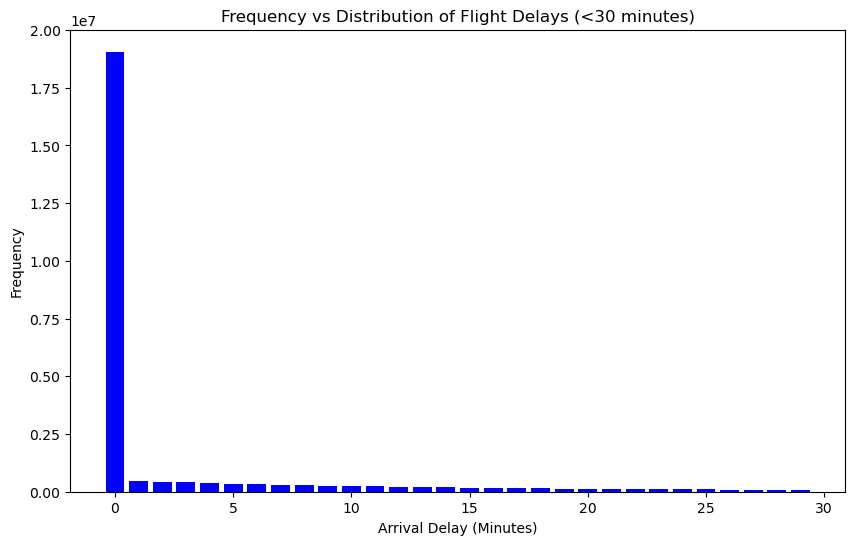

In [29]:
import matplotlib.pyplot as plt

# Filter flights with delays less than 30 minutes
filtered_df = df.filter(df.ArrDelayMinutes < 30)

# Calculate the frequency distribution of delays less than 30 minutes
delay_distribution = filtered_df.groupBy("ArrDelayMinutes").count().orderBy("ArrDelayMinutes")

# Convert PySpark DataFrame to Pandas DataFrame for plotting
pandas_delay_distribution = delay_distribution.toPandas()

# Plot the frequency vs distribution of flight delays
plt.figure(figsize=(10, 6))
plt.bar(pandas_delay_distribution["ArrDelayMinutes"], pandas_delay_distribution["count"], color='blue')
plt.xlabel("Arrival Delay (Minutes)")
plt.ylabel("Frequency")
plt.title("Frequency vs Distribution of Flight Delays (<30 minutes)")
plt.show()

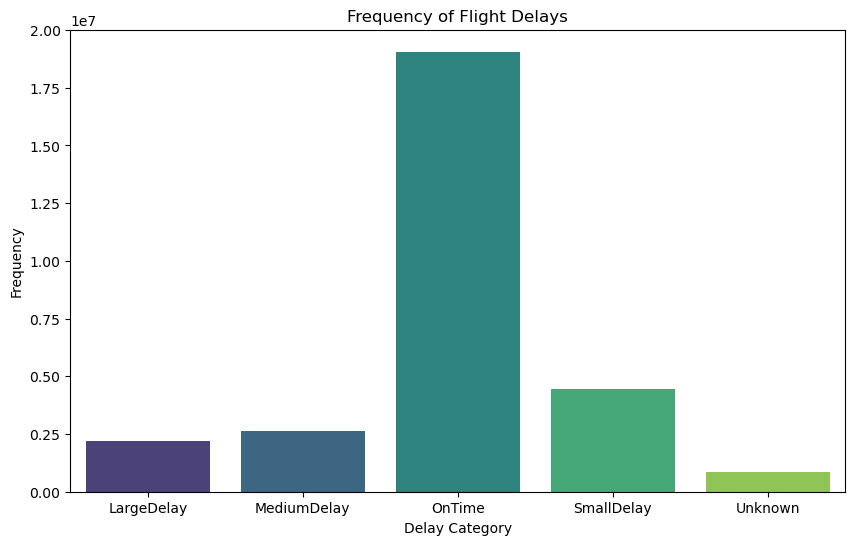

In [30]:
import seaborn as sns

delay_column = "ArrDelayMinutes"

# Bucketize delays into categories
df = df.withColumn("DelayCategory", when(col(delay_column) <= 0, "OnTime")
                                   .when((col(delay_column) > 0) & (col(delay_column) <= 15), "SmallDelay")
                                   .when((col(delay_column) > 15) & (col(delay_column) <= 45), "MediumDelay")
                                   .when(col(delay_column) > 45, "LargeDelay")
                                   .otherwise("Unknown"))

# Group by delay categories and count the occurrences
delay_counts = df.groupBy("DelayCategory").count().orderBy("DelayCategory")

# Convert to Pandas for plotting with Seaborn
delay_counts_pd = delay_counts.toPandas()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x="DelayCategory", y="count", data=delay_counts_pd, palette="viridis")
plt.xlabel("Delay Category")
plt.ylabel("Frequency")
plt.title("Frequency of Flight Delays")
plt.show()


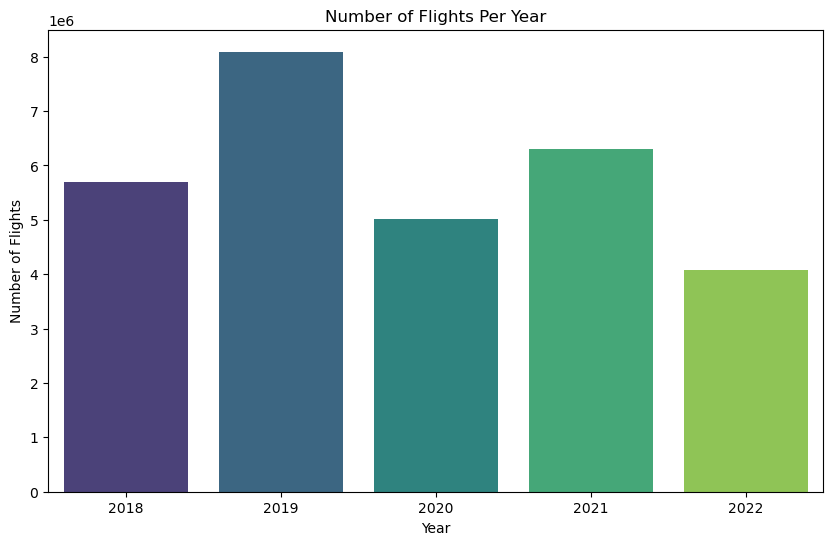

In [31]:
from pyspark.sql.functions import year

date_column = "FlightDate"

# Extract the year from the flight date
df = df.withColumn("Year", year(col(date_column)))

# Group by year and count the number of flights
flights_per_year = df.groupBy("Year").count().orderBy("Year")

# Convert to Pandas for plotting with Seaborn
flights_per_year_pd = flights_per_year.toPandas()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="count", data=flights_per_year_pd, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Number of Flights")
plt.title("Number of Flights Per Year")
plt.show()


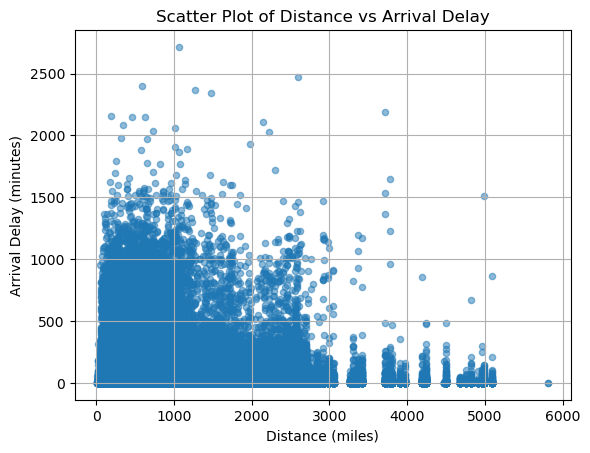

In [32]:
# the sample(False, 0.1) is used to sample 10% of the data for faster plotting. The fraction can be adjusted as needed.
# Plotting the scatter plot directly with PySpark
df.select("Distance", "ArrDelayMinutes").sample(False, 0.1).toPandas().plot.scatter(
    x='Distance', y='ArrDelayMinutes', alpha=0.5
)

plt.title('Scatter Plot of Distance vs Arrival Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)

# Show the plot
plt.show()


In [35]:
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("FlightDataAnalysis").getOrCreate()

diversion_columns = ["Diverted", "Dest", "Origin"]

# Select relevant columns for diversion analysis
diversion_df = df.select(diversion_columns)

# Count the total number of diversions
total_diversions = diversion_df.filter(col("Diverted") == 1).count()
print("Total Number of Diversions:", total_diversions)

# Group by origin and count the number of diversions for each origin airport
diversions_by_origin = diversion_df.groupBy("Origin").count().sort("count", ascending=False)
print("Diversions by Origin Airport:")
diversions_by_origin.show()

# Group by destination and count the number of diversions for each destination airport
diversions_by_destination = diversion_df.groupBy("Dest").count().sort("count", ascending=False)
print("Diversions by Destination Airport:")
diversions_by_destination.show()

# Analyze delays and cancellations based on city markets
city_market_columns = ["Cancelled", "ArrDelayMinutes", "OriginCityMarketID", "DestCityMarketID"]

# Select relevant columns for delay and cancellation analysis
city_market_df = df.select(city_market_columns)

# Group by origin city market and calculate average delay and cancellation rate
average_delay_by_origin_market = city_market_df.groupBy("OriginCityMarketID").avg("ArrDelayMinutes").sort("OriginCityMarketID")
cancellation_rate_by_origin_market = city_market_df.groupBy("OriginCityMarketID").avg("Cancelled").sort("OriginCityMarketID")

# Group by destination city market and calculate average delay and cancellation rate
average_delay_by_dest_market = city_market_df.groupBy("DestCityMarketID").avg("ArrDelayMinutes").sort("DestCityMarketID")
cancellation_rate_by_dest_market = city_market_df.groupBy("DestCityMarketID").avg("Cancelled").sort("DestCityMarketID")

# Show the results
print("Average Delay by Origin City Market:")
average_delay_by_origin_market.show()

print("Cancellation Rate by Origin City Market:")
cancellation_rate_by_origin_market.show()

print("Average Delay by Destination City Market:")
average_delay_by_dest_market.show()

print("Cancellation Rate by Destination City Market:")
cancellation_rate_by_dest_market.show()


Total Number of Diversions: 68349
Diversions by Origin Airport:
+------+-------+
|Origin|  count|
+------+-------+
|   ORD|1375187|
|   ATL|1371796|
|   DEN|1170585|
|   DFW|1104266|
|   CLT| 907841|
|   LAX| 851262|
|   SEA| 725350|
|   IAH| 689477|
|   PHX| 677155|
|   LAS| 666148|
|   SFO| 599413|
|   DTW| 593392|
|   EWR| 578014|
|   MCO| 574361|
|   MSP| 544492|
|   LGA| 527881|
|   BOS| 512522|
|   PHL| 492259|
|   DCA| 467788|
|   SLC| 467546|
+------+-------+
only showing top 20 rows

Diversions by Destination Airport:
+----+-------+
|Dest|  count|
+----+-------+
| ORD|1375012|
| ATL|1371789|
| DEN|1170597|
| DFW|1104182|
| CLT| 907769|
| LAX| 851282|
| SEA| 725299|
| IAH| 689325|
| PHX| 677095|
| LAS| 666271|
| SFO| 599559|
| DTW| 593321|
| EWR| 578010|
| MCO| 574362|
| MSP| 544449|
| LGA| 527881|
| BOS| 512522|
| PHL| 492231|
| DCA| 467825|
| SLC| 467781|
+----+-------+
only showing top 20 rows



AnalysisException: "Cancelled" is not a numeric column. Aggregation function can only be applied on a numeric column.

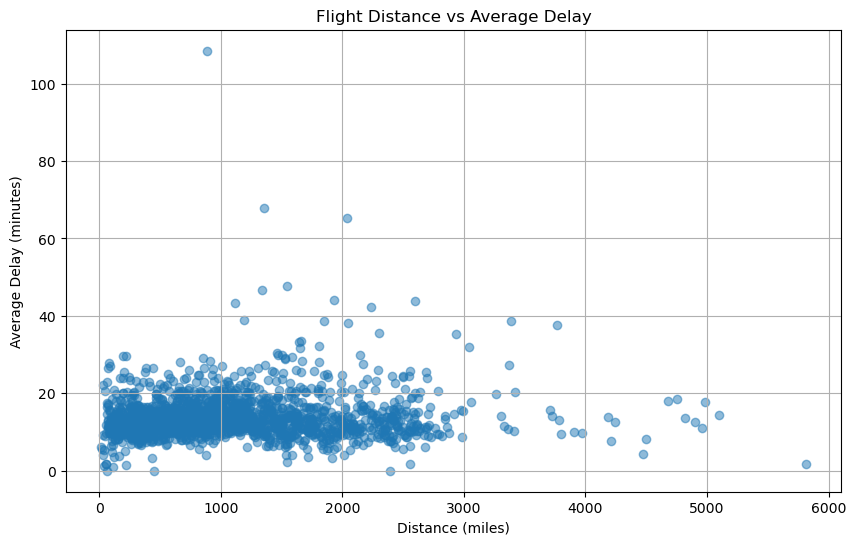

In [39]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("FlightDistanceDelayAnalysis").getOrCreate()

distance_delay_df = df.select("Distance", "ArrDelayMinutes")

# Drop null values
distance_delay_df = distance_delay_df.dropna()

# Group by distance and calculate average delay
average_delay_by_distance = distance_delay_df.groupBy("Distance").agg(
    F.avg("ArrDelayMinutes").alias("AverageDelayMinutes")
)

# Convert the DataFrame to Pandas for visualization
pandas_df = average_delay_by_distance.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df["Distance"], pandas_df["AverageDelayMinutes"], alpha=0.5)
plt.title("Flight Distance vs Average Delay")
plt.xlabel("Distance (miles)")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()


In [40]:
from pyspark.sql import functions as F

# Select relevant columns for analysis
routes_delay_df = df.select("Origin", "Dest", "ArrDelayMinutes")

# Drop null values
routes_delay_df = routes_delay_df.dropna()

# Group by Origin and Dest, calculate total delay for each route
total_delay_by_route = routes_delay_df.groupBy("Origin", "Dest").agg(
    F.sum("ArrDelayMinutes").alias("TotalDelayMinutes")
)

# Order the results to find the top routes with delays
top_routes_with_delays = total_delay_by_route.orderBy(
    F.desc("TotalDelayMinutes")
)

# Show the top routes with delays
top_routes_with_delays.show()


+------+----+-----------------+
|Origin|Dest|TotalDelayMinutes|
+------+----+-----------------+
|   ORD| LGA|         847292.0|
|   LGA| ORD|         799423.0|
|   LAX| SFO|         716115.0|
|   MCO| EWR|         680013.0|
|   SFO| LAX|         644837.0|
|   EWR| MCO|         570994.0|
|   LAX| JFK|         521486.0|
|   LAS| LAX|         511060.0|
|   FLL| EWR|         503385.0|
|   JFK| LAX|         488855.0|
|   DCA| BOS|         474967.0|
|   LAX| LAS|         461163.0|
|   BOS| LGA|         458312.0|
|   EWR| FLL|         451058.0|
|   LGA| BOS|         449761.0|
|   ATL| EWR|         445699.0|
|   ORD| DFW|         430021.0|
|   DEN| ORD|         428368.0|
|   ORD| BOS|         418980.0|
|   SEA| SFO|         418938.0|
+------+----+-----------------+
only showing top 20 rows



In [41]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Create a Spark session
spark = SparkSession.builder.appName("BusiestMonthAnalysis").getOrCreate()

# Select relevant columns for analysis
monthly_flight_counts = df.groupBy("Month").count()

# Order the results to find the busiest month
busiest_month = monthly_flight_counts.orderBy(F.desc("count")).first()

# Extract the month and count from the result
busiest_month_number = busiest_month["Month"]
busiest_month_count = busiest_month["count"]

print(f"The busiest month is {busiest_month_number} with {busiest_month_count} flights.")


The busiest month is 3 with 2794295 flights.


In [42]:
from pyspark.sql import functions as F

daily_flight_counts = df.groupBy("DayofMonth").count()

# Order the results to find the busiest days
busiest_days = daily_flight_counts.orderBy(F.desc("count")).limit(15)

# Display the top 15 busiest days
print("Top 15 Busiest Days:")
busiest_days.show()

# Now, let's find the top 15 days with the most delays
# Select relevant columns for delay analysis
daily_delay_counts = df.filter(df.ArrDelayMinutes > 0).groupBy("DayofMonth").count()

# Order the results to find the days with the most delays
top_delayed_days = daily_delay_counts.orderBy(F.desc("count")).limit(15)

# Display the top 15 days with the most delays
print("\nTop 15 Days with Most Delays:")
top_delayed_days.show()


Top 15 Busiest Days:
+----------+------+
|DayofMonth| count|
+----------+------+
|        21|971743|
|        18|969055|
|        17|968478|
|        19|968383|
|        20|966511|
|        10|966469|
|        24|964862|
|        11|964652|
|        27|964110|
|        12|963734|
|        23|963063|
|        22|962935|
|        13|962864|
|        28|959350|
|        15|959135|
+----------+------+


Top 15 Days with Most Delays:
+----------+------+
|DayofMonth| count|
+----------+------+
|        13|325638|
|        18|325232|
|        12|324641|
|        20|321500|
|        21|321240|
|        19|320598|
|        11|317456|
|        17|314893|
|        15|314081|
|        10|310049|
|        16|309236|
|        14|309076|
|         9|306952|
|         7|306439|
|        22|304575|
+----------+------+



In [43]:
from pyspark.sql import functions as F

daily_flight_counts = df.groupBy("FlightDate").count()

# Order the results to find the busiest days
busiest_days = daily_flight_counts.orderBy(F.desc("count")).limit(15)

# Display the top 15 busiest days
print("Top 15 Busiest Days:")
busiest_days.show()

# Now, let's find the top 15 days with the most delays
daily_delay_counts = df.filter(df.ArrDelayMinutes > 0).groupBy("FlightDate").count()

# Order the results to find the days with the most delays
top_delayed_days = daily_delay_counts.orderBy(F.desc("count")).limit(15)

print("\nTop 15 Days with Most Delays:")
top_delayed_days.show()


Top 15 Busiest Days:
+----------+-----+
|FlightDate|count|
+----------+-----+
|2019-12-01|24739|
|2019-08-02|24416|
|2019-08-05|24388|
|2019-08-01|24378|
|2019-07-26|24368|
|2019-07-19|24363|
|2019-07-29|24348|
|2019-07-22|24348|
|2019-07-15|24341|
|2019-07-25|24339|
|2019-07-12|24331|
|2019-07-18|24328|
|2019-08-09|24319|
|2019-07-08|24309|
|2019-07-11|24303|
+----------+-----+


Top 15 Days with Most Delays:
+----------+-----+
|FlightDate|count|
+----------+-----+
|2019-12-01|12777|
|2018-11-09|12767|
|2018-12-28|12741|
|2018-12-21|12134|
|2018-11-16|11923|
|2020-02-13|11884|
|2018-12-27|11879|
|2019-06-20|11860|
|2018-11-15|11753|
|2018-11-26|11725|
|2020-02-06|11722|
|2019-06-19|11697|
|2018-12-20|11578|
|2022-01-02|11482|
|2019-06-13|11385|
+----------+-----+



In [45]:
from pyspark.sql import functions as F

# Extract the month and day from the "FlightDate" column
df = df.withColumn("Month", F.month("FlightDate"))
df = df.withColumn("DayOfMonth", F.dayofmonth("FlightDate"))

# Select relevant columns for analysis
daily_flight_counts = df.groupBy("Month", "DayOfMonth").count()

# Order the results to find the busiest dates
busiest_dates = daily_flight_counts.orderBy(F.desc("count")).limit(15)

# Display the top 15 busiest dates
print("Top 15 Busiest Dates:")
busiest_dates.show()


Top 15 Busiest Dates:
+-----+----------+-----+
|Month|DayOfMonth|count|
+-----+----------+-----+
|    1|         2|95854|
|    1|         3|95019|
|    3|        18|94680|
|    3|        25|94099|
|    4|         1|93969|
|    3|        11|93902|
|    3|        20|93077|
|    3|        22|92667|
|    3|        13|92645|
|    3|        19|92567|
|    3|        15|92455|
|    3|        12|92018|
|    3|        27|91937|
|    4|         5|91771|
|    3|        26|91689|
+-----+----------+-----+



In [5]:
from pyspark.sql.functions import expr

# Calculate the on-time departure rate for each airline
on_time_departures = df.groupBy("Airline").agg(
    expr("SUM(CASE WHEN DepDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100").alias("OnTimeDepartureRate")
).orderBy("OnTimeDepartureRate", ascending=False)

# Calculate the on-time arrival rate for each airline
on_time_arrivals = df.groupBy("Airline").agg(
    expr("SUM(CASE WHEN ArrDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100").alias("OnTimeArrivalRate")
).orderBy("OnTimeArrivalRate", ascending=False)

# Calculate the average departure delay for each airline
average_departure_delay = df.groupBy("Airline").agg(
    expr("AVG(DepDelayMinutes)").alias("AverageDepartureDelay")
).orderBy("AverageDepartureDelay", ascending=False)

# Calculate the average arrival delay for each airline
average_arrival_delay = df.groupBy("Airline").agg(
    expr("AVG(ArrDelayMinutes)").alias("AverageArrivalDelay")
).orderBy("AverageArrivalDelay", ascending=False)

# Show the results
on_time_departures.show()
on_time_arrivals.show()
average_departure_delay.show()
average_arrival_delay.show()

+--------------------+-------------------+
|             Airline|OnTimeDepartureRate|
+--------------------+-------------------+
|            Cape Air|  91.93257074051776|
|Hawaiian Airlines...|   90.0924120444556|
|   Endeavor Air Inc.|  86.03860456170158|
|Delta Air Lines Inc.|  85.81639537505801|
|         Horizon Air|  85.62823541397381|
|Alaska Airlines Inc.|  84.16777102351534|
|   Republic Airlines|  83.40840256009173|
|SkyWest Airlines ...|  83.17179286656288|
|Capital Cargo Int...|  82.61732451385294|
|           Envoy Air|  82.50542050638623|
|    Compass Airlines|  82.21763396457722|
|         Comair Inc.|  81.01993272184032|
|United Air Lines ...|   80.9723181362968|
|Air Wisconsin Air...|   80.9254028121893|
|Empire Airlines Inc.|  80.87103191765418|
|      Virgin America|  80.46406338426712|
|    Spirit Air Lines|  79.89456121353804|
|  Mesa Airlines Inc.|  79.86908982189382|
|American Airlines...|  79.66087417923453|
|GoJet Airlines, L...|  79.15735335604695|
+----------

In [6]:
from pyspark.sql.functions import expr

# Calculate the on-time departure rate for each airline
on_time_departures = df.groupBy("Airline").agg(
    expr("SUM(CASE WHEN DepDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100").alias("OnTimeDepartureRate")
).orderBy("OnTimeDepartureRate", ascending=True)

# Calculate the on-time arrival rate for each airline
on_time_arrivals = df.groupBy("Airline").agg(
    expr("SUM(CASE WHEN ArrDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100").alias("OnTimeArrivalRate")
).orderBy("OnTimeArrivalRate", ascending=True)

# Show the results
on_time_departures.show()
on_time_arrivals.show()


+--------------------+-------------------+
|             Airline|OnTimeDepartureRate|
+--------------------+-------------------+
|Peninsula Airways...|  56.77326625943226|
|     JetBlue Airways|  72.48569044344933|
|Commutair Aka Cha...|  73.43605795853072|
|       Allegiant Air|  73.93583980384145|
|Frontier Airlines...|  74.07003569099592|
|Trans States Airl...|   74.1419642304598|
|Southwest Airline...|  76.14689188959616|
|ExpressJet Airlin...|  78.45895455920649|
|GoJet Airlines, L...|  79.15735335604695|
|American Airlines...|  79.66087417923453|
|  Mesa Airlines Inc.|  79.86908982189382|
|    Spirit Air Lines|  79.89456121353804|
|      Virgin America|  80.46406338426712|
|Empire Airlines Inc.|  80.87103191765418|
|Air Wisconsin Air...|   80.9254028121893|
|United Air Lines ...|   80.9723181362968|
|         Comair Inc.|  81.01993272184032|
|    Compass Airlines|  82.21763396457722|
|           Envoy Air|  82.50542050638623|
|Capital Cargo Int...|  82.61732451385294|
+----------

In [10]:
#ORIGIN AND DESTINATION ANALYSIS
# Calculate the number of flights for each origin
flights_per_origin = df.groupBy("Origin").agg(
    expr("COUNT(*) as NumFlightsPerOrigin")
).orderBy("NumFlightsPerOrigin", ascending=False)

# Calculate the number of flights for each destination
flights_per_destination = df.groupBy("Dest").agg(
    expr("COUNT(*) as NumFlightsPerDestination")
).orderBy("NumFlightsPerDestination", ascending=False)

# Calculate the average departure delay for each origin
average_departure_delay_per_origin = df.groupBy("Origin").agg(
    expr("AVG(DepDelayMinutes) as AvgDepartureDelayPerOrigin")
).orderBy("AvgDepartureDelayPerOrigin", ascending=False)

# Calculate the average arrival delay for each destination
average_arrival_delay_per_destination = df.groupBy("Dest").agg(
    expr("AVG(ArrDelayMinutes) as AvgArrivalDelayPerDestination")
).orderBy("AvgArrivalDelayPerDestination", ascending=False)

# Calculate on-time departure rate for each origin
on_time_departures_per_origin = df.groupBy("Origin").agg(
    expr("SUM(CASE WHEN DepDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100 as OnTimeDepartureRatePerOrigin")
).orderBy("OnTimeDepartureRatePerOrigin", ascending=False)

# Calculate on-time arrival rate for each destination
on_time_arrivals_per_destination = df.groupBy("Dest").agg(
    expr("SUM(CASE WHEN ArrDel15 = 0 THEN 1 ELSE 0 END) / COUNT(*) * 100 as OnTimeArrivalRatePerDestination")
).orderBy("OnTimeArrivalRatePerDestination", ascending=False)

# Show the results
flights_per_origin.show()
flights_per_destination.show()
average_departure_delay_per_origin.show()
average_arrival_delay_per_destination.show()
on_time_departures_per_origin.show()
on_time_arrivals_per_destination.show()


+------+-------------------+
|Origin|NumFlightsPerOrigin|
+------+-------------------+
|   ORD|            1375187|
|   ATL|            1371796|
|   DEN|            1170585|
|   DFW|            1104266|
|   CLT|             907841|
|   LAX|             851262|
|   SEA|             725350|
|   IAH|             689477|
|   PHX|             677155|
|   LAS|             666148|
|   SFO|             599413|
|   DTW|             593392|
|   EWR|             578014|
|   MCO|             574361|
|   MSP|             544492|
|   LGA|             527881|
|   BOS|             512522|
|   PHL|             492259|
|   DCA|             467788|
|   SLC|             467546|
+------+-------------------+
only showing top 20 rows

+----+------------------------+
|Dest|NumFlightsPerDestination|
+----+------------------------+
| ORD|                 1375012|
| ATL|                 1371789|
| DEN|                 1170597|
| DFW|                 1104182|
| CLT|                  907769|
| LAX|                